<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In this we are evaluating the student performance and in order to to approach this project, we will perform Bayesian analysis to answer key questions about the students' performance, determine where struggles occur, and suggest areas for targeted test preparation. Here's how we can structure the analysis:

# **But, First I would like to talk about what is Bayesian and why Bayesian in quick summary:**
Excerpt from Probabilistic-Programming-and-Bayesian-Methods-for-Hackers  Chapter1_Introduction:

## **The Philosophy of Bayesian Inference:**
"You are a skilled programmer, but bugs still slip into your code. After a particularly difficult implementation of an algorithm, you decide to test your code on a trivial example. It passes. You test the code on a harder problem. It passes once again. And it passes the next, even more difficult, test too! You are starting to believe that there may be no bugs in this code...

If you think this way, then congratulations, you already are thinking Bayesian! Bayesian inference is simply updating your beliefs after considering new evidence."

## **Quick note on why Bayesian:**
"The Bayesian world-view interprets probability as measure of believability in an event, that is, how confident we are in an event occurring. In fact, we will see in a moment that this is the natural interpretation of probability."


## **Overview:**
Strengths of Bayesian Statistics that are critical here:
1. Great flexibility to quickly and iteratively build statistical models.
2. Offers principled way of dealing with uncertainity.
3. Don't just want most likely outcome but distribution of all possible outcomes.
4. Allows expert information to guide model by using informative priors.






## **Back to Student Performance project Key Hypothesis Tests:**

#### We will perform the following tests using Bayesian methods:



*   Gender-Based Performance Analysis: Do male and female students perform differently in reading, writing, and math: **Refer Model1, Model2, and Model3**

*   Test Preparation Impact: Does completing a test preparation course lead to better performance in any of the subjects **Refer Model4**
*   Race/Ethnicity-Based Performance Differences: Are there performance differences across race/ethnicity groups in any of the subjects **Refer Model5**


*   Parental Education and Performance: Does the parental level of education correlate with student performance **Refer Model6**


### **For this project, I will use python - pymc version in lieu of R**

**Below are the steps I followed for Bayesian Tests:**

For each test:


*   Model Setup: We'll use the test scores (reading, writing, math) as continuous outcomes and test the effect of factors like gender, test preparation, and race/ethnicity.

*   Priors: Choose reasonable priors for the parameters (e.g., the mean and variance of the scores for each group).
*   Inference: Use PyMC to estimate the posterior distributions and compute credibility intervals for the group means.


*   Visualization: Create visual aids like posterior plots and credibility interval visualizations to show the findings.


In [ ]:
!pip install pymc arviz


In [ ]:
!pip install jax jaxlib


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Student.csv to Student.csv


In [3]:
df = pd.read_csv('Student.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test _preparation_course,math_score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# **Model-1: Bayesian Analysis to compare the male and female students across one subject - Reading Scores.**

**Hypothesis for model-1,2,&3:**



*   Null Hypothesis (H₀): There is no significant difference in reading/math/writing scores between male and female students.
*   Alternative Hypothesis (H₁): There is a difference in reading/math/writing scores between male and female students.

Bayesian Approach:

We will model the reading/math/writing scores of male and female students as coming from Normal distributions, with separate means and shared standard deviations for each group.
We will use priors for the mean reading/math/writing scores and standard deviation **( sigma = 10 - becuase the reading/math/writing scores are between 0 to 100)**, and we will infer the posterior distributions for the means of male and female students' reading/math/writing scores.
The key result will be the credible intervals for the posterior means of male and female students' reading/math/writing scores. If the credible intervals do not overlap, this suggests a significant difference between the groups.

### Below cell represents the code:

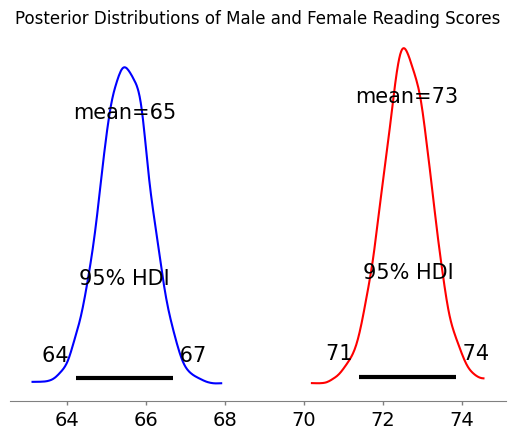

             mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu_male    65.478  0.632    64.223     66.685      0.008    0.006    6515.0   
mu_female  72.597  0.619    71.404     73.856      0.008    0.006    6036.0   

           ess_tail  r_hat  
mu_male      3315.0    1.0  
mu_female    3009.0    1.0  


In [7]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Extract reading scores by gender and having them stored as values
reading_scores_male = data[data['gender'] == 'male']['reading score'].values
reading_scores_female = data[data['gender'] == 'female']['reading score'].values

# Define the Bayesian model
with pm.Model() as gender_model:
    # Priors for the means of male and female reading scores
    #mu=70 becaue of that is close to average of 70
    #sigma = 10 (becuase the reading scores are between 0 to 100)
    mu_male = pm.Normal('mu_male', mu=70, sigma=10) # This defines the prior distribution for Male students
    mu_female = pm.Normal('mu_female', mu=70, sigma=10)# This defines the prior distribution for Female students

    # Shared prior for the standard deviation of the reading scores
    sigma = pm.HalfNormal('sigma', sigma=10) # This defines the prior distribution for standard deviation. Using half normal to have the value positive.

    # Likelihood for male and female reading scores
    male_obs = pm.Normal('male_obs', mu=mu_male, sigma=sigma, observed=reading_scores_male)
    female_obs = pm.Normal('female_obs', mu=mu_female, sigma=sigma, observed=reading_scores_female)

    # Inference: Sample from the posterior distribution
    trace_gender = pm.sample(2000, tune=1000, return_inferencedata=True)
    #This runs the MCMC sampling process to estimate the posterior distributions of the parameters (mu_male, mu_female, sigma).
    # 2000 samples are drawn, and 1000 of them are used for tuning (i.e., discarded during the "warm-up" phase).
    # THis is stored in "trace_gender"

# Plot posterior distributions for the means of male and female students
#
# Plot posterior distributions for the means of male and female students
fig, ax = plt.subplots()

# Male distribution (set color to 'blue')
az.plot_posterior(trace_gender, var_names=['mu_male'], hdi_prob=0.95, color='blue', ax=ax)

# Female distribution (set color to 'red')
az.plot_posterior(trace_gender, var_names=['mu_female'], hdi_prob=0.95, color='red', ax=ax)

# Show the plot
plt.title('Posterior Distributions of Male and Female Reading Scores')
plt.show()
# Arviz library plots the distributions for mu_male and mu_female
# It also displays the It displays the credible intervals (in this case, the 95% Highest Density Interval (HDI))
# which represent the most likely values for the mean reading scores of males and females, based on the data.


# Summarize the posterior distributions
summary = az.summary(trace_gender, var_names=['mu_male', 'mu_female'], hdi_prob=0.95)
#Highest Density Interval = 95%
print(summary)


**Interpreting Results for Reading Scores (Gender Difference-Model1):**

**In this analysis, we computed the 95% credibility intervals for the mean reading scores of male and female students. Here are the key results:**


**No Overlap in HDI:**

The 95% HDI for males is [64.22, 66.68].- The mean reading score for male students is 65.47. This means that we are 95% confident that the true mean reading score for male students lies between 64.22 and 66.68.

The 95% HDI for females is [71.40, 73.85].- The mean reading score for female students is 72.59. We are 95% confident that the true mean reading score for female students lies between 71.40 and 73.85.

Since these intervals do not overlap, it strongly suggests that the true mean reading scores for male and female students are different. There is no credible overlap between these intervals, meaning it is very unlikely that the true mean reading score for male students is the same as for female students.

**Conclusion:**
The lack of overlap between the 95% HDIs indicates a credible difference (or statistically significant difference) between the reading scores of male and female students. The mean reading score for female students is higher than that for male students, and the difference is large enough to be meaningful, not due to random variation.
This means that, based on the data, we can be quite confident that female students, on average, perform better in reading than male students.

# **Model-2: Bayesian Analysis to compare the male and female students across one subject - Math Scores.**
**I will use and consider same hypothesis and same proiors for this model as well as I did for Model-1(Reading Score):**

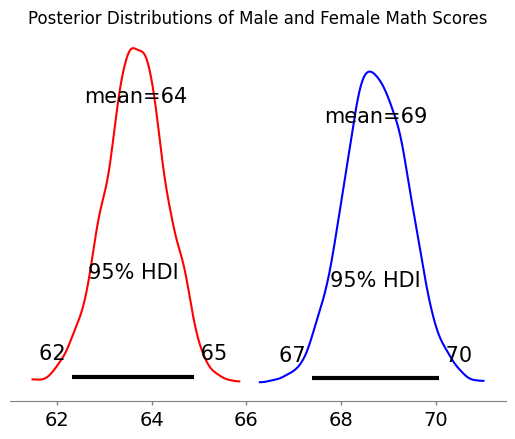

             mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu_male    68.743  0.688    67.393     70.075      0.009    0.007    5519.0   
mu_female  63.658  0.658    62.315     64.884      0.008    0.006    6284.0   

           ess_tail  r_hat  
mu_male      2571.0    1.0  
mu_female    3125.0    1.0  


In [14]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Extract math scores by gender
math_scores_male = data[data['gender'] == 'male']['math_score'].values
math_scores_female = data[data['gender'] == 'female']['math_score'].values

# Define the Bayesian model for gender-based analysis of math scores
with pm.Model() as gender_math_model:
    # Priors for the means of male and female math scores
    mu_male = pm.Normal('mu_male', mu=70, sigma=10)
    mu_female = pm.Normal('mu_female', mu=70, sigma=10)

    # Shared prior for the standard deviation of the math scores
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Likelihood for male and female math scores
    male_obs = pm.Normal('male_obs', mu=mu_male, sigma=sigma, observed=math_scores_male)
    female_obs = pm.Normal('female_obs', mu=mu_female, sigma=sigma, observed=math_scores_female)

    # Inference: Sample from the posterior distribution
    trace_gender_math = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distributions for the means of male and female students
# Male distribution (set color to 'blue')
fig, ax = plt.subplots()
az.plot_posterior(trace_gender_math, var_names=['mu_male'], hdi_prob=0.95, color='blue', ax=ax)

# Female distribution (set color to 'red')
az.plot_posterior(trace_gender_math, var_names=['mu_female'], hdi_prob=0.95, color='red', ax=ax)

# Show the plot
plt.title('Posterior Distributions of Male and Female Math Scores')
plt.show()
# Arviz library plots the distributions for mu_male and mu_female
# It also displays the It displays the credible intervals (in this case, the 95% Highest Density Interval (HDI))
# which represent the most likely values for the mean reading scores of males and females, based on the data.


# Summarize the posterior distributions
summary_math = az.summary(trace_gender_math, var_names=['mu_male', 'mu_female'], hdi_prob=0.95)
print(summary_math)


**Interpreting Results for Math Scores (Gender Difference-Model2):**

**In this analysis, we computed the 95% credibility intervals for the mean math scores of male and female students. Here are the key results:**

**No Overlap in HDI:**

The 95% HDI for males is [67.39, 70.07].- The mean math score for male students is 68.74. This means that we are 95% confident that the true mean math score for male students lies between 67.39 to 70.07.

The 95% HDI for females is [62.31, 64.88].- The mean math score for female students is 63.65. We are 95% confident that the true mean math score for female students lies between 62.31 to 64.88.

Since these intervals do not overlap, it strongly suggests that the true mean math scores for male and female students are different. There is no credible overlap between these intervals, meaning it is very unlikely that the true mean math score for male students is the same as for female students.

Conclusion: The lack of overlap between the 95% HDIs indicates a credible difference (or statistically significant difference) between the math scores of male and female students. The mean math score for male students is higher than that for female students, and the difference is large enough to be meaningful, not due to random variation. This means that, based on the data, we can be quite confident that male students, on average, perform better in math than female students.



# **Model-3: Bayesian Analysis to compare the male and female students across one subject - Writing Scores.**
**I will use and consider same hypothesis and same proiors for this model as well as I did for Model-1(Reading Score):**

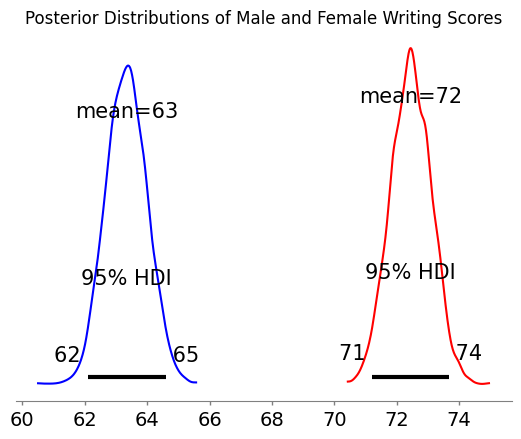

             mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu_male    63.340  0.651    62.091     64.599      0.009    0.006    5405.0   
mu_female  72.456  0.644    71.210     73.685      0.009    0.006    5439.0   

           ess_tail  r_hat  
mu_male      3261.0    1.0  
mu_female    2826.0    1.0  


In [13]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Extract writing scores by gender
writing_scores_male = data[data['gender'] == 'male']['writing score'].values
writing_scores_female = data[data['gender'] == 'female']['writing score'].values

# Define the Bayesian model for gender-based analysis of writing scores
with pm.Model() as gender_writing_model:
    # Priors for the means of male and female writing scores
    mu_male = pm.Normal('mu_male', mu=70, sigma=10)
    mu_female = pm.Normal('mu_female', mu=70, sigma=10)

    # Shared prior for the standard deviation of the writing scores
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Likelihood for male and female writing scores
    male_obs = pm.Normal('male_obs', mu=mu_male, sigma=sigma, observed=writing_scores_male)
    female_obs = pm.Normal('female_obs', mu=mu_female, sigma=sigma, observed=writing_scores_female)

    # Inference: Sample from the posterior distribution
    trace_gender_writing = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distributions for the means of male and female students
# Male distribution (set color to 'blue')
fig, ax = plt.subplots()
az.plot_posterior(trace_gender_writing, var_names=['mu_male'], hdi_prob=0.95, color='blue', ax=ax)

# Female distribution (set color to 'red')
az.plot_posterior(trace_gender_writing, var_names=['mu_female'], hdi_prob=0.95, color='red', ax=ax)

# Show the plot
plt.title('Posterior Distributions of Male and Female Writing Scores')
plt.show()
# Arviz library plots the distributions for mu_male and mu_female
# It also displays the It displays the credible intervals (in this case, the 95% Highest Density Interval (HDI))
# which represent the most likely values for the mean reading scores of males and females, based on the data.


# Summarize the posterior distributions
summary_writing = az.summary(trace_gender_writing, var_names=['mu_male', 'mu_female'], hdi_prob=0.95)
print(summary_writing)



**Interpreting Results for Writing Scores (Gender Difference-Model3):**


**In this analysis, we computed the 95% credibility intervals for the mean Writing scores of male and female students. Here are the key results:**

**No Overlap in HDI:**

The 95% HDI for males is [62.09, 64.59].- The mean writing score for male students is 63.34. This means that we are 95% confident that the true mean Writing score for male students lies between 62.09 to 64.59.

The 95% HDI for females is [71.21, 73.68].- The mean writing score for female students is 72.45. We are 95% confident that the true mean Writing score for female students lies between 71.21 to 73.68

Since these intervals do not overlap, it strongly suggests that the true mean Writing scores for male and female students are different. There is no credible overlap between these intervals, meaning it is very unlikely that the true mean Writing score for male students is the same as for female students.

Conclusion: The lack of overlap between the 95% HDIs indicates a credible difference (or statistically significant difference) between the Writing scores of male and female students. The mean Writing score for female students is higher than that for male students, and the difference is large enough to be meaningful, not due to random variation. This means that, based on the data, we can be quite confident that female students, on average, perform better in Writing than male students.

# **Model-4: Bayesian Analysis on analyzing the impact of test preparation on student performance across all three subjects (Reading, Math, Writing).**

#### I will compare with students who completed the test preparation course vs those who did not.

**Hypothesis:**


*   Null Hypothesis (H₀): There is no significant difference in performance between students who completed the test preparation course and those who did not.
*   Alternative Hypothesis (H₁): There is a difference in performance between students who completed the test preparation course and those who did not.

**Bayesian Approach:**
We will model the scores of students who completed the test preparation course and those who didn’t as coming from Normal distributions with different means (**Using student prep-70 and student not prepared-65**)and shared standard deviations **(10)**.
I will estimate the posterior distributions of the mean scores for each group (completed vs. none).
I will use credible intervals to assess whether the differences between the two groups are significant.

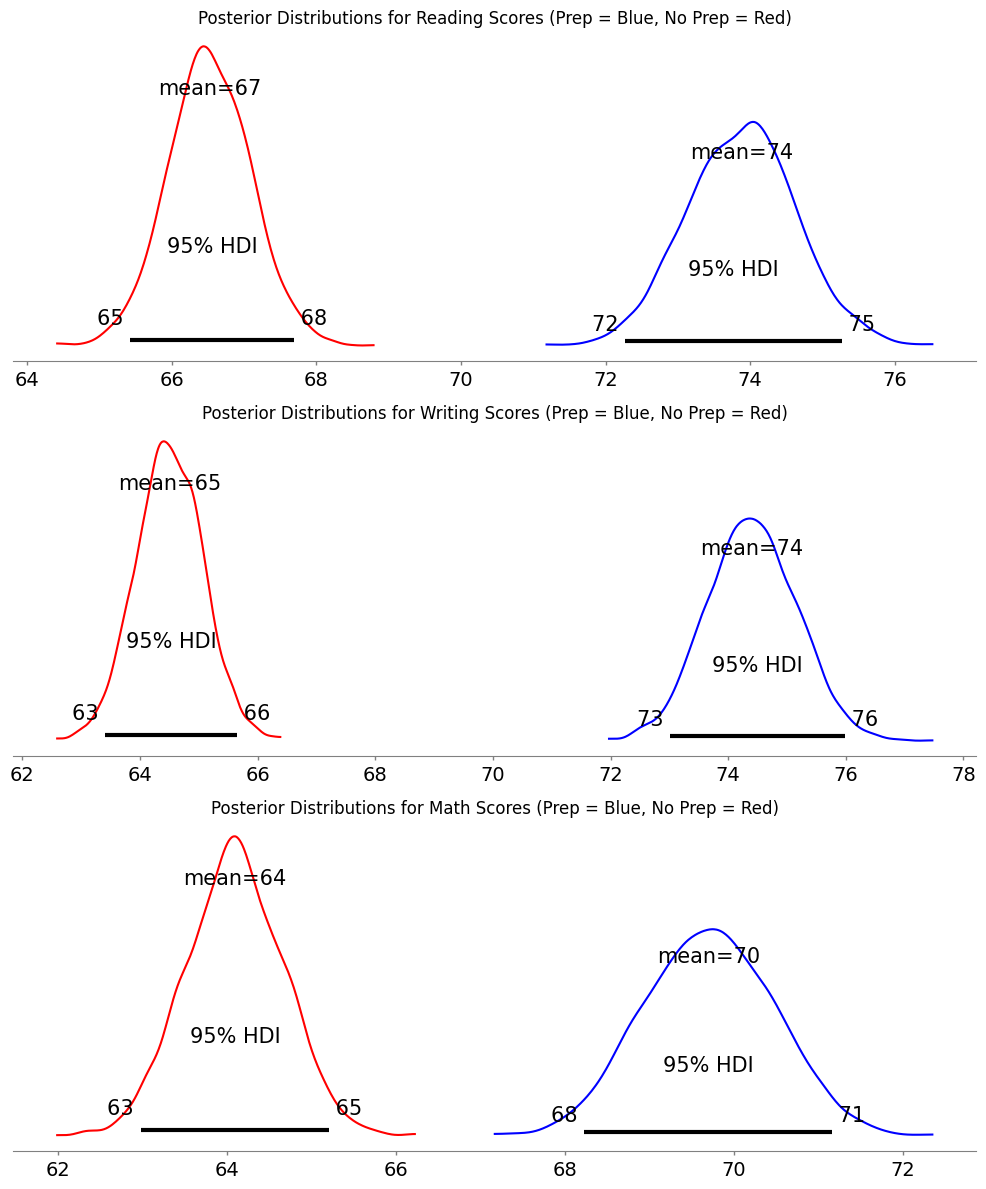

                      mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
mu_reading_prep     73.875  0.758    72.269     75.264      0.010    0.007   
mu_reading_no_prep  66.526  0.575    65.422     67.696      0.007    0.005   
mu_writing_prep     74.407  0.764    73.010     75.982      0.010    0.007   
mu_writing_no_prep  64.503  0.571    63.411     65.649      0.008    0.006   
mu_math_prep        69.705  0.769    68.223     71.156      0.011    0.008   
mu_math_no_prep     64.093  0.579    62.979     65.207      0.007    0.005   

                    ess_bulk  ess_tail  r_hat  
mu_reading_prep       5875.0    3346.0    1.0  
mu_reading_no_prep    6633.0    3225.0    1.0  
mu_writing_prep       5364.0    3130.0    1.0  
mu_writing_no_prep    5222.0    3315.0    1.0  
mu_math_prep          5190.0    3076.0    1.0  
mu_math_no_prep       6660.0    3233.0    1.0  


In [22]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Convert 'test preparation course' to a binary variable (1 if completed, 0 if none)
data['test_prep_binary'] = data['test _preparation_course'].apply(lambda x: 1 if x == 'completed' else 0)

# Extract test scores based on test preparation status (1 = completed, 0 = none)
reading_scores_prep = data[data['test_prep_binary'] == 1]['reading score'].values
reading_scores_no_prep = data[data['test_prep_binary'] == 0]['reading score'].values

writing_scores_prep = data[data['test_prep_binary'] == 1]['writing score'].values
writing_scores_no_prep = data[data['test_prep_binary'] == 0]['writing score'].values

math_scores_prep = data[data['test_prep_binary'] == 1]['math_score'].values
math_scores_no_prep = data[data['test_prep_binary'] == 0]['math_score'].values

# Bayesian model for the impact of test preparation on reading, writing, and math scores
with pm.Model() as test_prep_model:
    # Priors for the means of each group
    mu_reading_prep = pm.Normal('mu_reading_prep', mu=70, sigma=10)
    mu_reading_no_prep = pm.Normal('mu_reading_no_prep', mu=65, sigma=10)
    mu_writing_prep = pm.Normal('mu_writing_prep', mu=70, sigma=10)
    mu_writing_no_prep = pm.Normal('mu_writing_no_prep', mu=65, sigma=10)
    mu_math_prep = pm.Normal('mu_math_prep', mu=70, sigma=10)
    mu_math_no_prep = pm.Normal('mu_math_no_prep', mu=65, sigma=10)

    # Shared prior for the standard deviations of the scores
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Likelihood for reading scores
    reading_prep_obs = pm.Normal('reading_prep_obs', mu=mu_reading_prep, sigma=sigma, observed=reading_scores_prep)
    reading_no_prep_obs = pm.Normal('reading_no_prep_obs', mu=mu_reading_no_prep, sigma=sigma, observed=reading_scores_no_prep)

    # Likelihood for writing scores
    writing_prep_obs = pm.Normal('writing_prep_obs', mu=mu_writing_prep, sigma=sigma, observed=writing_scores_prep)
    writing_no_prep_obs = pm.Normal('writing_no_prep_obs', mu=mu_writing_no_prep, sigma=sigma, observed=writing_scores_no_prep)

    # Likelihood for math scores
    math_prep_obs = pm.Normal('math_prep_obs', mu=mu_math_prep, sigma=sigma, observed=math_scores_prep)
    math_no_prep_obs = pm.Normal('math_no_prep_obs', mu=mu_math_no_prep, sigma=sigma, observed=math_scores_no_prep)

    # Inference: Sample from the posterior distribution
    trace_test_prep = pm.sample(2000, tune=1000, return_inferencedata=True)

# Create subplots to customize the colors
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot reading scores for prep and no prep with different colors
az.plot_posterior(trace_test_prep, var_names=['mu_reading_prep'], hdi_prob=0.95, color='blue', ax=ax[0])
az.plot_posterior(trace_test_prep, var_names=['mu_reading_no_prep'], hdi_prob=0.95, color='red', ax=ax[0])
ax[0].set_title('Posterior Distributions for Reading Scores (Prep = Blue, No Prep = Red)')

# Plot writing scores for prep and no prep with different colors
az.plot_posterior(trace_test_prep, var_names=['mu_writing_prep'], hdi_prob=0.95, color='blue', ax=ax[1])
az.plot_posterior(trace_test_prep, var_names=['mu_writing_no_prep'], hdi_prob=0.95, color='red', ax=ax[1])
ax[1].set_title('Posterior Distributions for Writing Scores (Prep = Blue, No Prep = Red)')

# Plot math scores for prep and no prep with different colors
az.plot_posterior(trace_test_prep, var_names=['mu_math_prep'], hdi_prob=0.95, color='blue', ax=ax[2])
az.plot_posterior(trace_test_prep, var_names=['mu_math_no_prep'], hdi_prob=0.95, color='red', ax=ax[2])
ax[2].set_title('Posterior Distributions for Math Scores (Prep = Blue, No Prep = Red)')

# Display the plot
plt.tight_layout()
plt.show()

# Summarize the posterior distributions
summary_prep = az.summary(trace_test_prep, var_names=['mu_reading_prep', 'mu_reading_no_prep',
                                                      'mu_writing_prep', 'mu_writing_no_prep',
                                                      'mu_math_prep', 'mu_math_no_prep'], hdi_prob=0.95)
print(summary_prep)


**Interpreting Results for Impact of test preparation on student performance (Model-4):**

**Credible Interval (HDI) Analysis:**


**Reading Scores:**



*   **Prep Group (73.87):** The 95% HDI for students who completed the test preparation course is [72.26, 75.26], meaning the true mean reading score for this group is likely to fall within this range.
*   **No Prep Group (66.52):** The 95% HDI for students who did not complete the test preparation course is [65.42, 67.69].

**No Overlap in HDI:** The intervals do not overlap, which suggests a credible difference between the two groups. Students who completed test preparation tend to have significantly higher reading scores than those who did not.


**Writing Scores:**


*   **Prep Group (74.40):**The 95% HDI for the writing scores of students who completed the test preparation is [73.01, 75.98].
*   **No Prep Group (64.50):** The 95% HDI for students who did not complete the preparation is [63.41, 65.64].

**No Overlap in HDI:** Again, there is no overlap between the intervals, suggesting a strong and credible difference between the two groups. Students with test preparation tend to perform better in writing, with an approximate difference of 10 points in mean scores.

**Math Scores:**


*   **Prep Group (69.70):** The 95% HDI for students who completed the preparation course is [68.22, 71.15].
*   **No Prep Group (64.09):** The 95% HDI for students without preparation is [62.98, 65.21].


**No Overlap in HDI:** Once again, the intervals do not overlap, suggesting a credible difference in math scores between the two groups. The test preparation group scores about 5.6 points higher on average.

**Summary of Key Findings:**

**Statistically Credible Differences:**

The credible intervals (HDI) for all subjects (reading, writing, and math) do not overlap between the groups, which suggests that the difference between students who completed test preparation and those who did not is statistically credible. This indicates that test preparation has a positive impact on student performance across all three subjects.

**Magnitude of Differences:**

The **reading** scores show a **7.35-point difference** in the mean between the prep and no-prep groups, with **test-prep students scoring higher**.
The **writing** scores show an even larger difference, approximately **10 points**, which suggests that **test preparation has the most significant effect** on writing scores.
The **math** scores show a **5.6-point difference**, indicating that test preparation has a positive but slightly smaller effect on math performance compared to reading and writing.




# **Model-5: Bayesian analysis to compare performance differences across race/ethnicity groups for all three subjects: reading, writing, and math.**

**Hypothesis:**


*   Null Hypothesis (H₀): There is no significant difference in performance between race/ethnicity groups.
*   Alternative Hypothesis (H₁): There are performance differences between race/ethnicity groups.

**Bayesian Approach:**
I will model the scores for each race/ethnicity group as coming from Normal distributions with sames means and shared standard deviations.

**Why share same means:** If there isn't specific domain knowledge or prior data suggesting that different race/ethnicity groups should have different mean test scores, it's often best to use a common prior for the means across all groups. This allows the data to drive the inference without imposing assumptions that may bias the results

We will estimate the posterior distributions of the mean scores for each race/ethnicity group for each subject (reading, writing, math).
We will use credible intervals to assess whether the differences between the groups are significant.

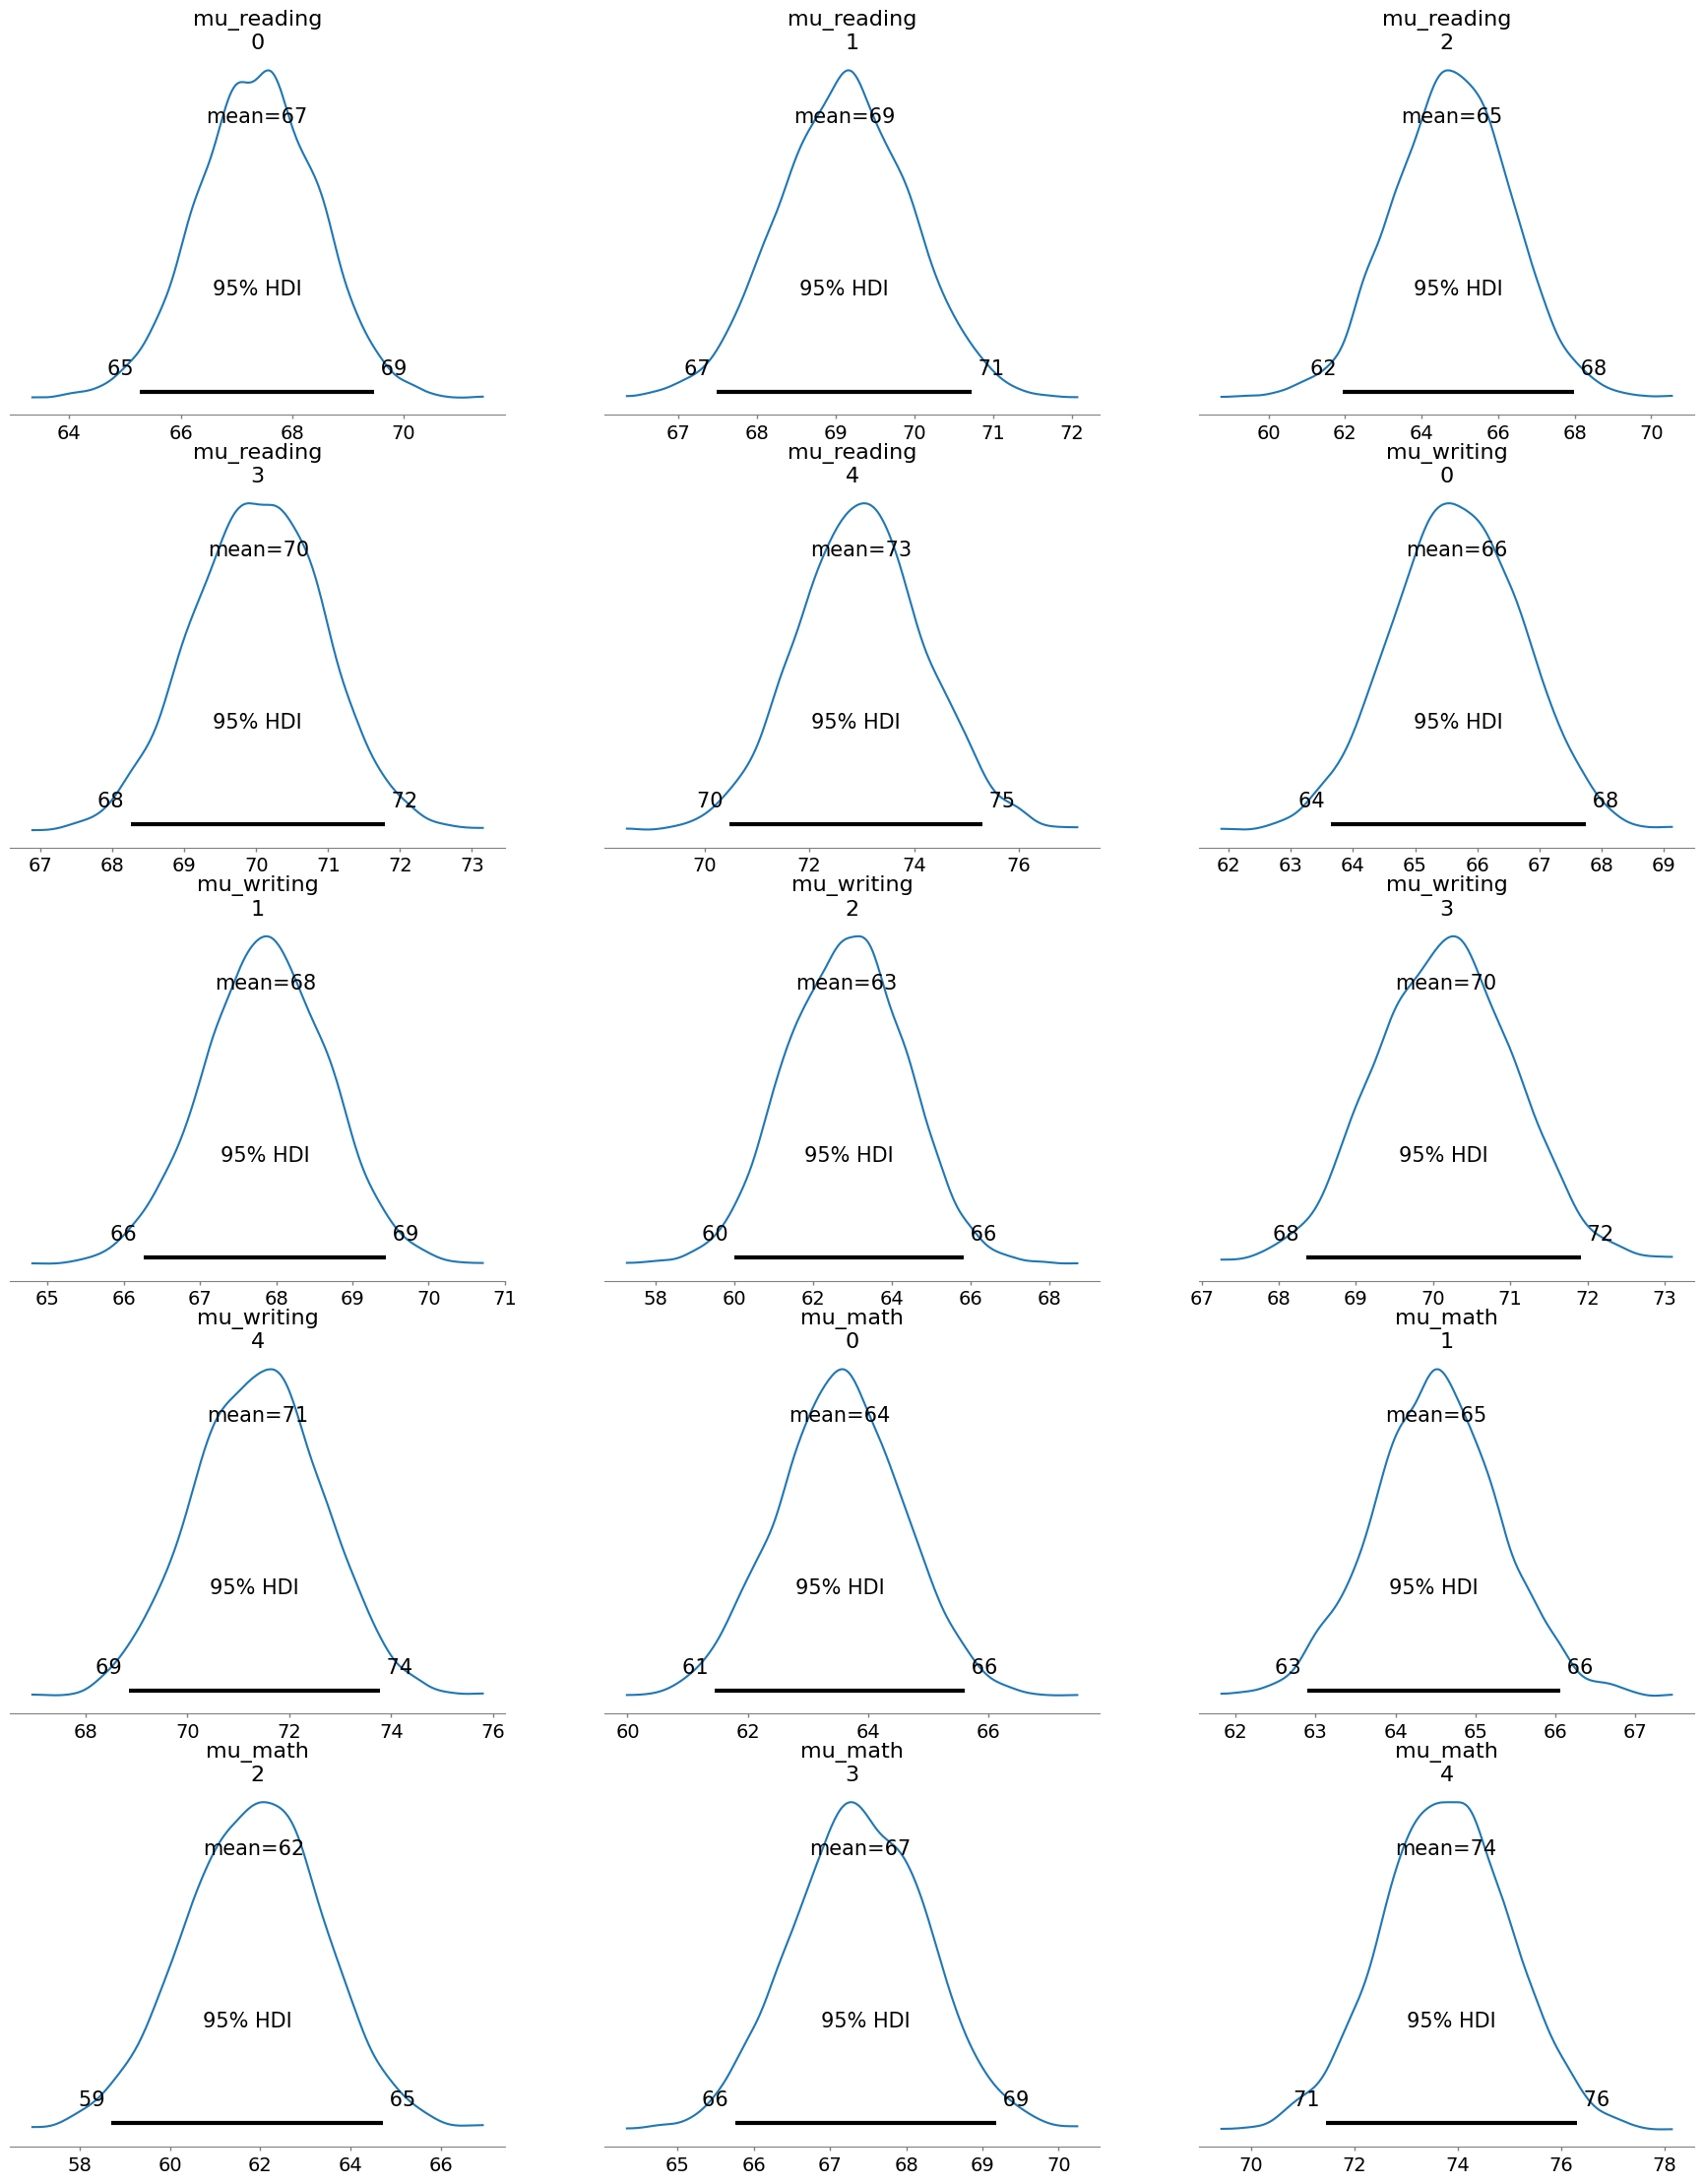

                 mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
mu_reading[0]  67.372  1.078    65.272     69.469      0.012    0.009   
mu_reading[1]  69.110  0.831    67.492     70.718      0.010    0.007   
mu_reading[2]  64.791  1.552    61.934     67.994      0.017    0.012   
mu_reading[3]  70.027  0.911    68.250     71.785      0.010    0.007   
mu_reading[4]  72.988  1.234    70.478     75.310      0.014    0.010   
mu_writing[0]  65.664  1.056    63.652     67.748      0.013    0.009   
mu_writing[1]  67.854  0.812    66.258     69.443      0.009    0.007   
mu_writing[2]  62.838  1.510    59.992     65.820      0.017    0.012   
mu_writing[3]  70.160  0.910    68.351     71.916      0.011    0.007   
mu_writing[4]  71.384  1.273    68.848     73.784      0.015    0.011   
mu_math[0]     63.527  1.061    61.458     65.603      0.013    0.009   
mu_math[1]     64.504  0.809    62.903     66.059      0.009    0.007   
mu_math[2]     61.857  1.534    58.706     64.722  

In [23]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Extract race/ethnicity categories and test scores
race_ethnicity_groups = data['race/ethnicity'].unique()
reading_scores = {group: data[data['race/ethnicity'] == group]['reading score'].values for group in race_ethnicity_groups}
writing_scores = {group: data[data['race/ethnicity'] == group]['writing score'].values for group in race_ethnicity_groups}
math_scores = {group: data[data['race/ethnicity'] == group]['math_score'].values for group in race_ethnicity_groups}

# Bayesian model for performance differences across race/ethnicity
with pm.Model() as race_model:
    # Priors for the means of each race/ethnicity group
    mu_reading = pm.Normal('mu_reading', mu=70, sigma=10, shape=len(race_ethnicity_groups))
    mu_writing = pm.Normal('mu_writing', mu=70, sigma=10, shape=len(race_ethnicity_groups))
    mu_math = pm.Normal('mu_math', mu=70, sigma=10, shape=len(race_ethnicity_groups))

    # Shared prior for the standard deviations of the scores
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Likelihood for reading scores for each race/ethnicity group
    for i, group in enumerate(race_ethnicity_groups):
        pm.Normal(f'reading_obs_{group}', mu=mu_reading[i], sigma=sigma, observed=reading_scores[group])

    # Likelihood for writing scores for each race/ethnicity group
    for i, group in enumerate(race_ethnicity_groups):
        pm.Normal(f'writing_obs_{group}', mu=mu_writing[i], sigma=sigma, observed=writing_scores[group])

    # Likelihood for math scores for each race/ethnicity group
    for i, group in enumerate(race_ethnicity_groups):
        pm.Normal(f'math_obs_{group}', mu=mu_math[i], sigma=sigma, observed=math_scores[group])

    # Inference: Sample from the posterior distribution
    trace_race = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distributions for the means of each subject by race/ethnicity
az.plot_posterior(trace_race, var_names=['mu_reading', 'mu_writing', 'mu_math'], hdi_prob=0.95)
plt.show()

# Summarize the posterior distributions for race/ethnicity performance differences
summary_race = az.summary(trace_race, var_names=['mu_reading', 'mu_writing', 'mu_math'], hdi_prob=0.95)
print(summary_race)


**Interpreting Results for compare performance differences across race/ethnicity groups for all three subjects (Model-5):**

**Interpretation of the Mean Scores:**

The mean scores for each race/ethnicity group vary across subjects. Here's what we can infer:

**Group 4 consistently has the highest mean scores across all three subjects (reading: 72.99, writing: 71.38, math: 73.75).**

**Group 2 has the lowest mean scores across all subjects (reading: 64.79, writing: 62.83, math: 61.85).**

Other groups fall in between, but Group 3 and Group 1 generally perform better than Group 0 and Group 2.

**No Overlap in HDIs:** In many cases, the HDIs between groups do not overlap, indicating that there are credible differences between the groups.

For example, Group 4 (HDI: [70.48, 75.31]) and Group 2 (HDI: [61.93, 67.99]) have non-overlapping HDIs in reading scores, suggesting that Group 4 performs significantly better than Group 2 in reading.

**MCSE (Monte Carlo Standard Error):** The MCSE values are all quite small, ranging from 0.009 to 0.018, indicating that the MCMC process has produced reliable estimates of the posterior means.

**Conclusion:**

**Performance Differences:** Group4 has consistently has the highest mean scores across all subjectes (reading, writing, math) while group2 has lowest scores. These results are backed by the 95% credible intervals, which often do not overlap between groups, suggesting strong and credible differences. The posterior estimates are robust, with well-converged chains and high effective sample sizes.

# **Model-6: Bayesian analysis to compare Parental Education with Student Performance (parental level of education correlate with student performance):**

**Hypothesis:**
*   Null Hypothesis (H₀): There is no significant difference in student performance based on parental education levels.
*   Alternative Hypothesis (H₁): There are differences in student performance based on parental education levels.

**Bayesian Approach:**
We will model the test scores (reading, writing, math) of students based on their parental education levels, assuming that the scores for each education level group come from different Normal distributions.
We will estimate the posterior distributions for the mean scores of each group and use credible intervals to assess whether the differences between groups are significant.



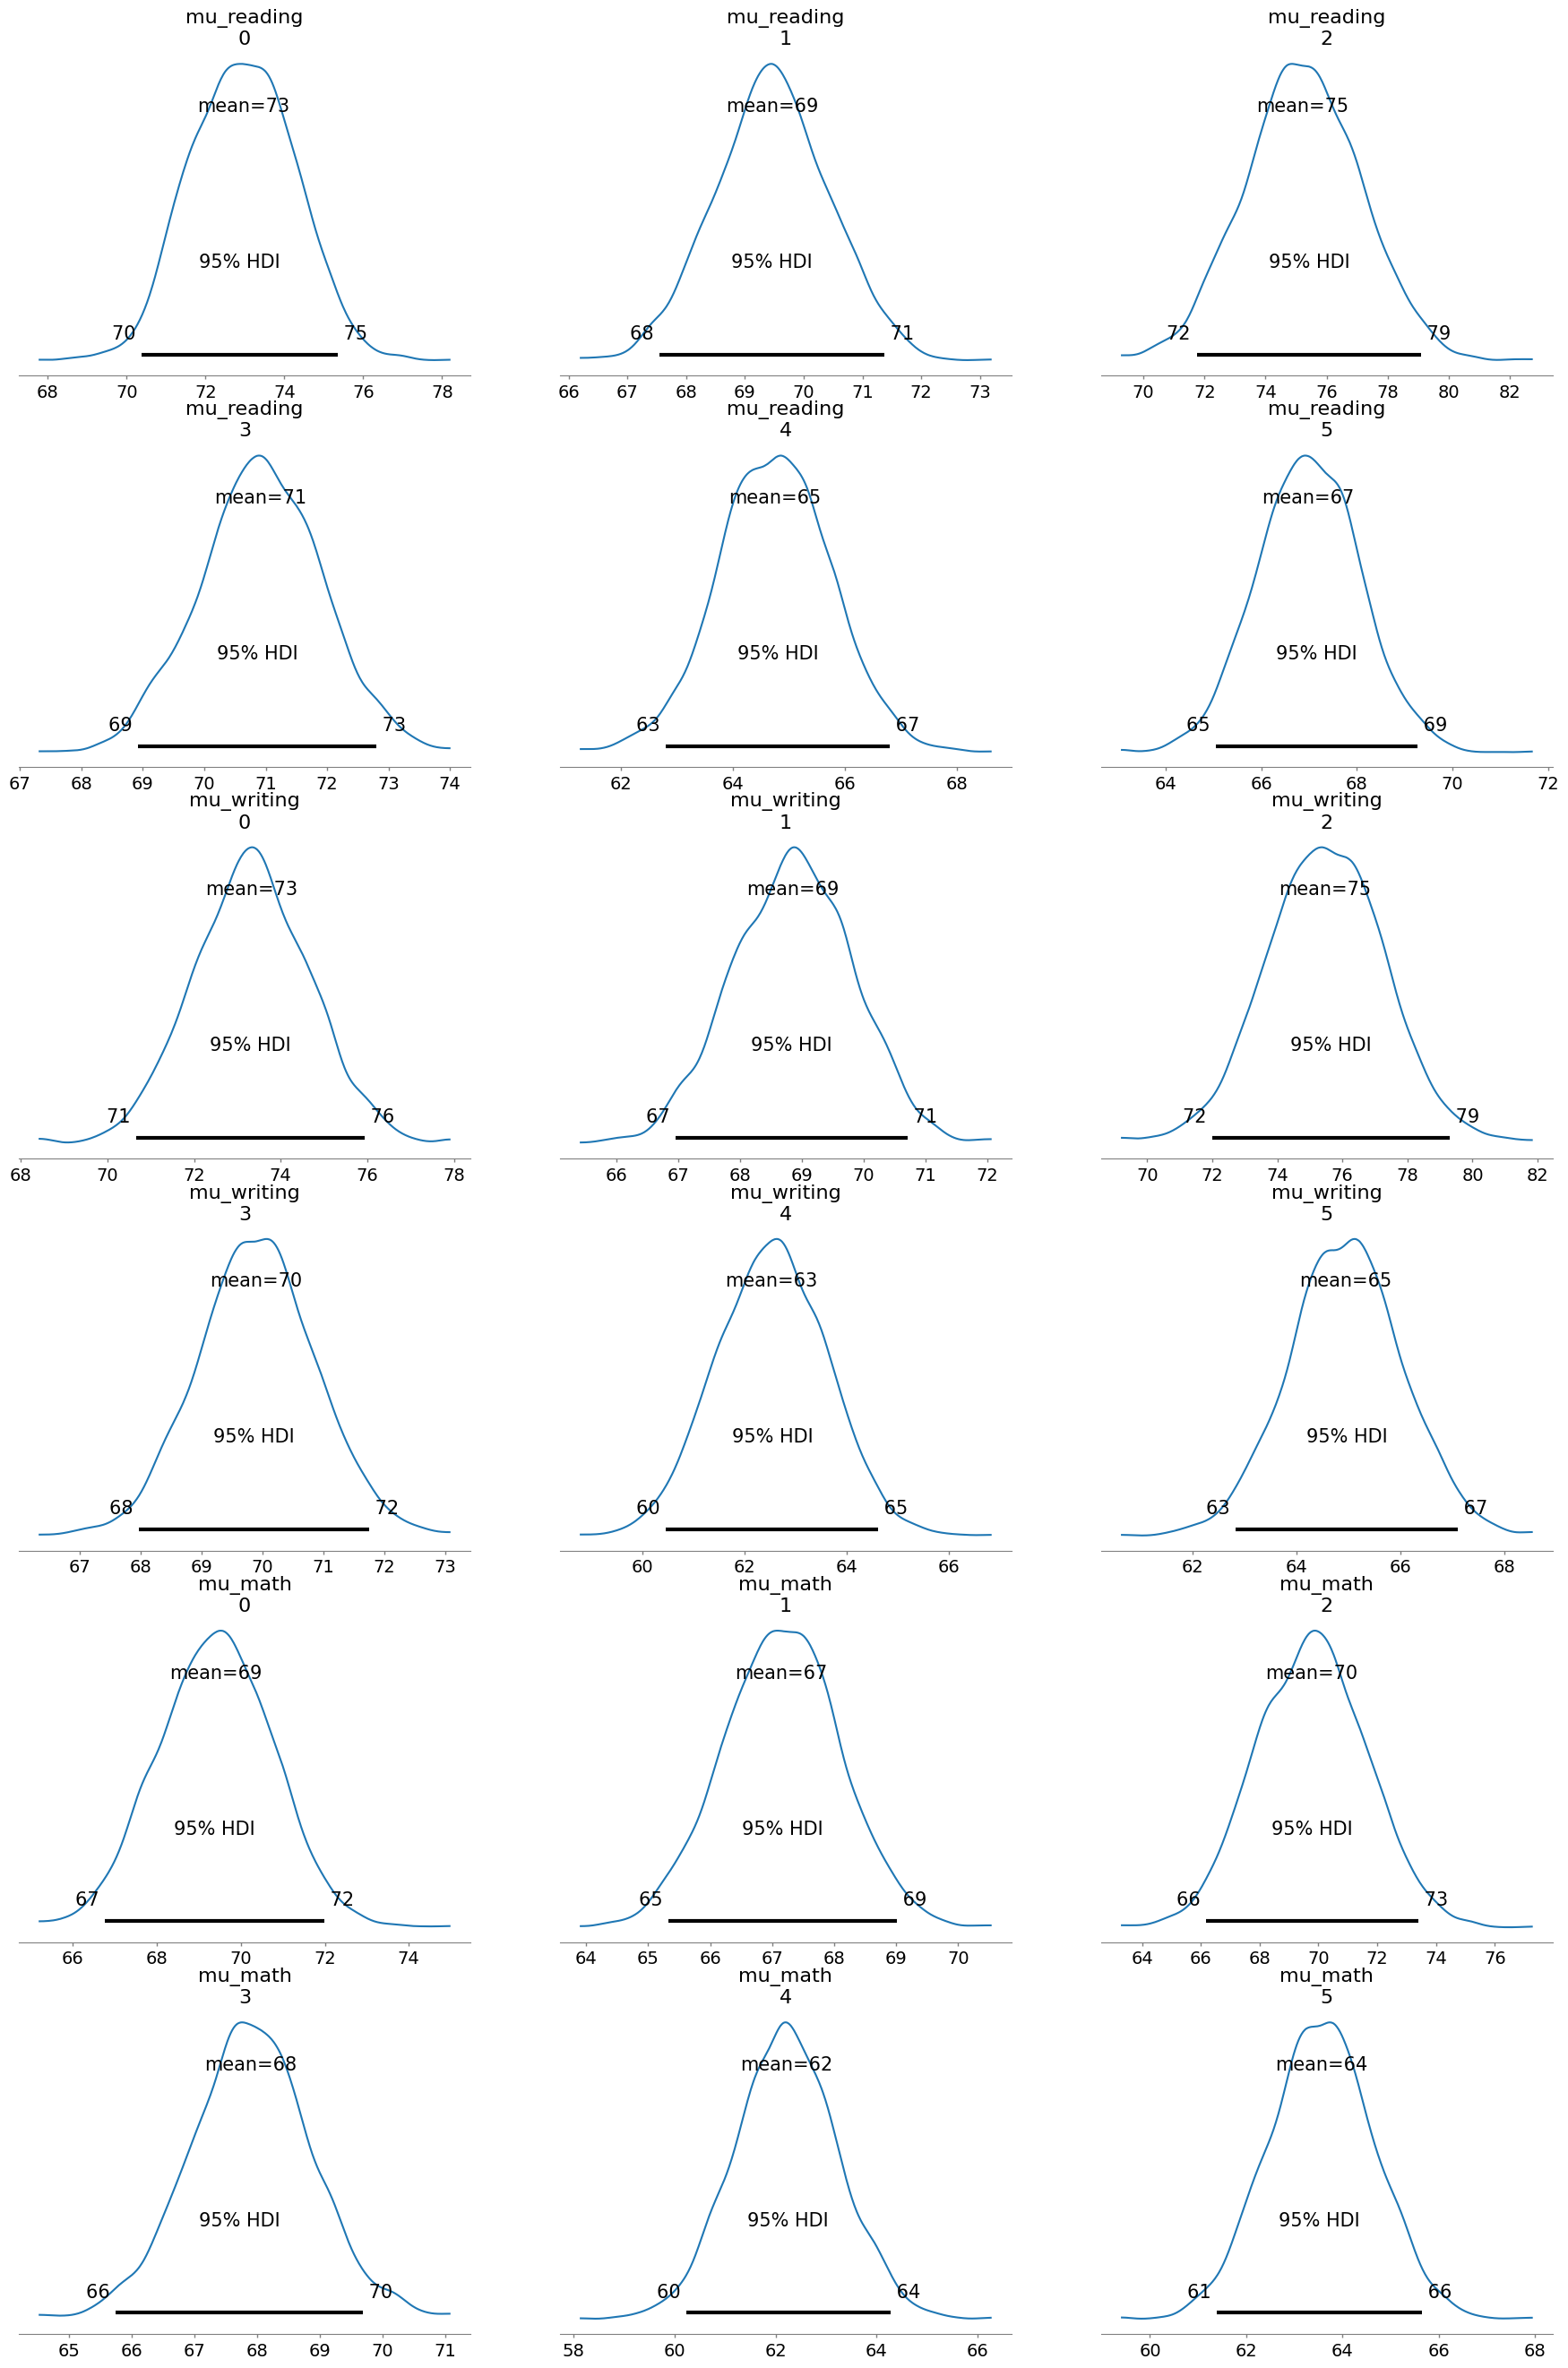

                 mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
mu_reading[0]  72.952  1.327    70.379     75.366      0.014    0.010   
mu_reading[1]  69.467  0.973    67.539     71.375      0.010    0.007   
mu_reading[2]  75.204  1.903    71.745     79.108      0.022    0.016   
mu_reading[3]  70.921  0.989    68.922     72.798      0.011    0.008   
mu_reading[4]  64.742  1.015    62.804     66.807      0.013    0.009   
mu_reading[5]  66.985  1.073    65.048     69.265      0.012    0.008   
mu_writing[0]  73.332  1.351    70.664     75.939      0.014    0.010   
mu_writing[1]  68.858  0.978    66.957     70.708      0.011    0.007   
mu_writing[2]  75.472  1.851    72.002     79.302      0.019    0.013   
mu_writing[3]  69.899  0.973    67.971     71.759      0.011    0.008   
mu_writing[4]  62.531  1.075    60.470     64.622      0.012    0.009   
mu_writing[5]  64.946  1.092    62.838     67.102      0.012    0.009   
mu_math[0]     69.393  1.365    66.758     71.997  

In [31]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Extract parental education categories and test scores
parental_education_groups = data['parental level of education'].unique()
reading_scores = {group: data[data['parental level of education'] == group]['reading score'].values for group in parental_education_groups}
writing_scores = {group: data[data['parental level of education'] == group]['writing score'].values for group in parental_education_groups}
math_scores = {group: data[data['parental level of education'] == group]['math_score'].values for group in parental_education_groups}

# Bayesian model for performance differences across parental education levels
with pm.Model() as parental_education_model:
    # Priors for the means of each parental education group
    mu_reading = pm.Normal('mu_reading', mu=70, sigma=10, shape=len(parental_education_groups))
    mu_writing = pm.Normal('mu_writing', mu=70, sigma=10, shape=len(parental_education_groups))
    mu_math = pm.Normal('mu_math', mu=70, sigma=10, shape=len(parental_education_groups))

    # Shared prior for the standard deviations of the scores
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Likelihood for reading scores for each parental education group
    for i, group in enumerate(parental_education_groups):
        pm.Normal(f'reading_obs_{group}', mu=mu_reading[i], sigma=sigma, observed=reading_scores[group])

    # Likelihood for writing scores for each parental education group
    for i, group in enumerate(parental_education_groups):
        pm.Normal(f'writing_obs_{group}', mu=mu_writing[i], sigma=sigma, observed=writing_scores[group])

    # Likelihood for math scores for each parental education group
    for i, group in enumerate(parental_education_groups):
        pm.Normal(f'math_obs_{group}', mu=mu_math[i], sigma=sigma, observed=math_scores[group])

    # Inference: Sample from the posterior distribution
    trace_parental_education = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distributions for the means of each subject by parental education
az.plot_posterior(trace_parental_education, var_names=['mu_reading', 'mu_writing', 'mu_math'], hdi_prob=0.95)
plt.show()

# Summarize the posterior distributions for parental education performance differences
summary_parental_education = az.summary(trace_parental_education, var_names=['mu_reading', 'mu_writing', 'mu_math'], hdi_prob=0.95)
print(summary_parental_education)


**Interpreting Results for Bayesian analysis to compare Parental Education with Student Performance for all three subjects (Model-6):**

**Mean Scores:**

The mean column gives the estimated mean score for each parental education group. Here’s a breakdown of the highest and lowest performing groups across subjects:

**Reading:**


*   Highest Mean: mu_reading[2] (Group 2) with a mean score of 75.20.
*   Lowest Mean: mu_reading[4] (Group 4) with a mean score of 64.74.


**Writing:**


*   Highest Mean: mu_writing[2] (Group 2) with a mean score of 75.47.
*   Lowest Mean: mu_writing[4] (Group 4) with a mean score of 62.53.


**Math:**


*   Highest Mean: mu_math[0] (Group 0) with a mean score of 69.39.
*   Lowest Mean: mu_math[4] (Group 4) with a mean score of 62.22.

**Non-overlapping HDIs:**

The credible intervals do not overlap between certain groups, which indicates a credible (statistically significant) difference. For instance, mu_reading[2] (Group 2) has an HDI of [71.75, 79.11], which does not overlap with mu_reading[4] (Group 4) with an HDI of [62.80, 66.81]. This suggests that Group 2 (**Masters Degree**) performs significantly better in reading than Group 4 (**High School**).

**Conclusion:**
This Bayesian analysis shows credible differences in student performance based on parental education levels. In particular, Group 2 (**Masters Degree**) consistently performs better in all subjects (reading, writing, and math), while Group 4 (**High School**) has the lowest scores across the board. The credible intervals and the lack of overlap between certain groups suggest that these differences are statistically significant.